In [2]:
!pip install FOOOF --user

  Using cached fooof-1.0.0-py3-none-any.whl (112 kB)


In [1]:
%%time
from SynPy import *

#--Run Options--#
conf_dir = os.path.join(os.getcwd(), 'confs/')
output_dir = os.path.join(os.getcwd(), 'outputs/')


grid_dir_name = 'bursts_oscillation_hr/'
new_conf_dir = os.path.join(conf_dir, grid_dir_name)
new_output_dir = os.path.join(output_dir, grid_dir_name)

# Run 
params = { # Replaces each dictionary key with the corresponding value in the .conf
    'Onset:': 150,
    'Duration:': 200,
    'Time:' : 600
}

perm_dict = {'Bursts' : [2,20,1],
             'Oscillation' : [1,20,1]}

CPU times: user 692 ms, sys: 165 ms, total: 857 ms
Wall time: 1.68 s


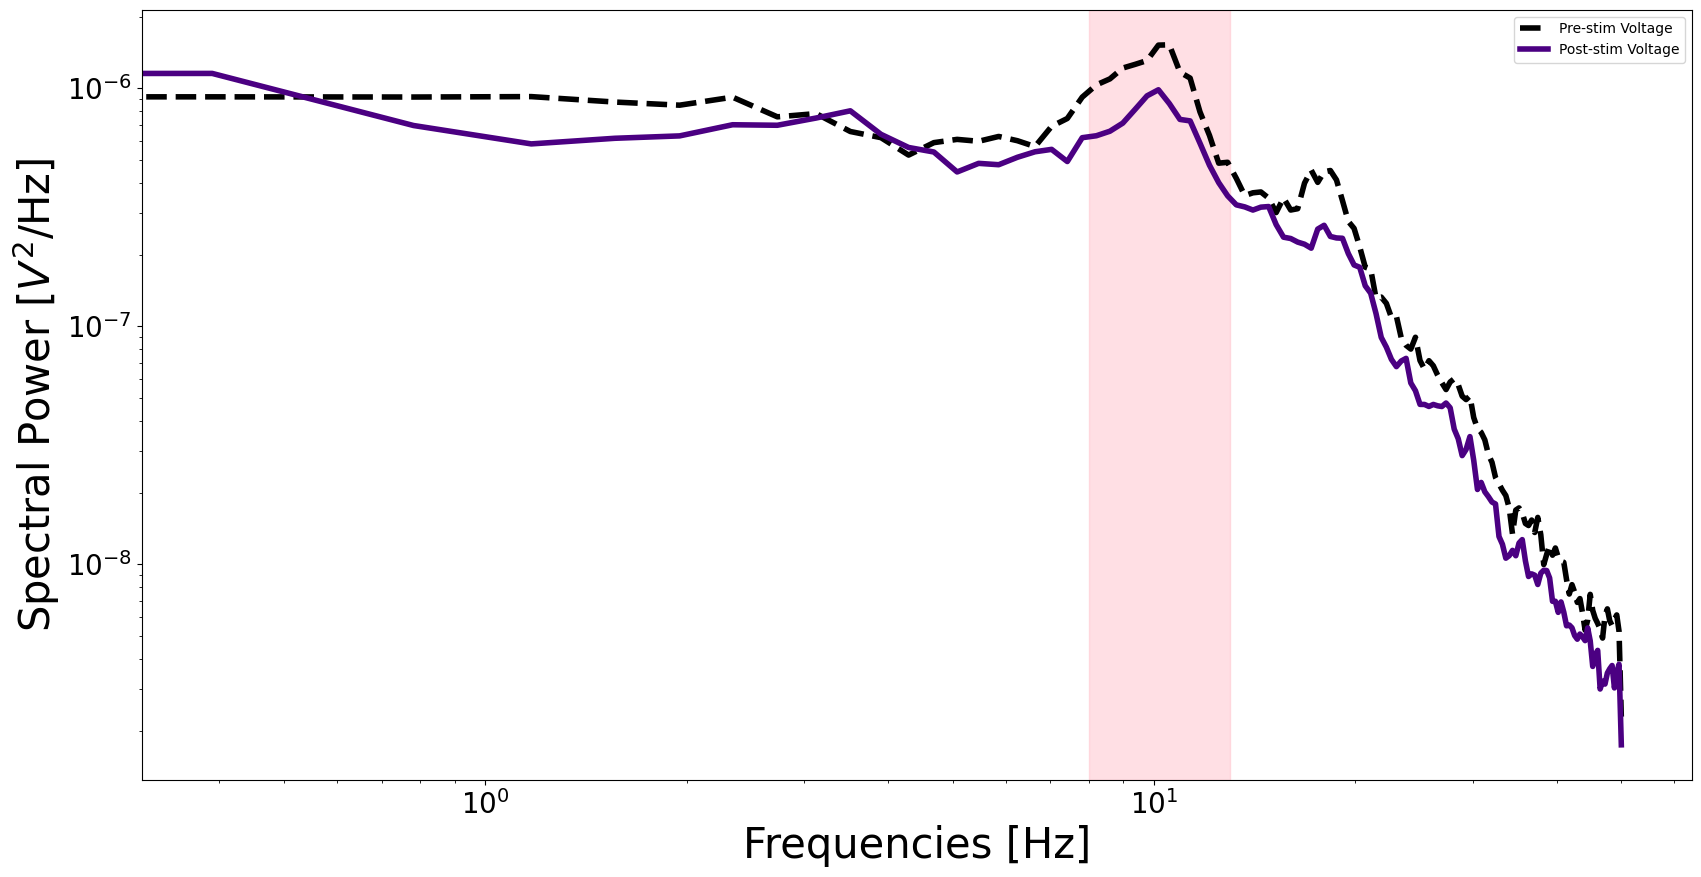

In [13]:
def grab_protocol(ppb, osc):
    
    field = 'propagator.ee.phi'
#     field = 'pop.e.v'
#     field = 'pop.e.q'

    output_dir = '/gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/working/outputs/bursts_oscillation/'

    keywords = [f'bur={ppb}', f'osc={osc}']
    f_names_list = list_files(output_dir, extension_filter='.output')
    select_f_name = [string for string in f_names_list if all(keyword in string for keyword in keywords)][0]

    protocol = dot_output(os.path.join(output_dir, select_f_name))
    
    sampling_freq = protocol.sampling_rate
    df = protocol.df()
    
    stim_onset = 150
    stim_duration = 200
    
    pre_signal = df[field].loc[:stim_onset - 5]
    post_signal = df[field].loc[(stim_onset+stim_duration) + 105:]
    
    return [pre_signal, post_signal, sampling_freq]

ppb = 3
osc = 7

pre_signal, post_signal, sampling_freq = grab_protocol(ppb, osc)
graph_PSD_delta(pre_signal, post_signal, sampling_freq)

In [3]:
quick_conf('eirs-tms-custom.conf', conf_dir, output_dir)


Wrote 1 new conf files to: /gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/PyNFTsim/confs/


NameError: name 'output_to_df' is not defined

In [2]:
grid = list_files(new_output_dir, extension_filter='.output')

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/PyNFTsim/outputs/bursts_oscillation_hr/'

In [ ]:
from ipywidgets import interact_manual

interact_manual(psd_delta, ppb=(2,20,1), osc=(1,20,1));